### STOCK PREDICTION USING PYTHON!!!

### Importing the necessary libraries.

In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Read the Data from Yahoo finance website directly.

In [2]:
def fetch_data(ticker, start_date, end_date):
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data

stocks = ['AAPL', 'GOOGL', 'AMZN', 'MSFT']
start_date = '2022-01-01'
end_date = '2023-01-01'

stock_data = {stock: fetch_data(stock, start_date, end_date) for stock in stocks}
stock_data

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


{'AAPL':                   Open        High         Low       Close   Adj Close  \
 Date                                                                     
 2022-01-03  177.830002  182.880005  177.710007  182.009995  179.953888   
 2022-01-04  182.630005  182.940002  179.119995  179.699997  177.670013   
 2022-01-05  179.610001  180.169998  174.639999  174.919998  172.943985   
 2022-01-06  172.699997  175.300003  171.639999  172.000000  170.056976   
 2022-01-07  172.889999  174.139999  171.029999  172.169998  170.225067   
 ...                ...         ...         ...         ...         ...   
 2022-12-23  130.919998  132.419998  129.639999  131.860001  131.127060   
 2022-12-27  131.380005  131.410004  128.720001  130.029999  129.307236   
 2022-12-28  129.669998  131.029999  125.870003  126.040001  125.339409   
 2022-12-29  127.989998  130.479996  127.730003  129.610001  128.889572   
 2022-12-30  128.410004  129.949997  127.430000  129.929993  129.207779   
 
               

### What was the change in stock price over time?

In [3]:
for stock, data in stock_data.items():
    print(data['Adj Close'])

Date
2022-01-03    179.953888
2022-01-04    177.670013
2022-01-05    172.943985
2022-01-06    170.056976
2022-01-07    170.225067
                 ...    
2022-12-23    131.127060
2022-12-27    129.307236
2022-12-28    125.339409
2022-12-29    128.889572
2022-12-30    129.207779
Name: Adj Close, Length: 251, dtype: float64
Date
2022-01-03    144.991501
2022-01-04    144.399506
2022-01-05    137.774994
2022-01-06    137.747498
2022-01-07    137.016998
                 ...    
2022-12-23     89.230003
2022-12-27     87.389999
2022-12-28     86.019997
2022-12-29     88.449997
2022-12-30     88.230003
Name: Adj Close, Length: 251, dtype: float64
Date
2022-01-03    170.404495
2022-01-04    167.522003
2022-01-05    164.356995
2022-01-06    163.253998
2022-01-07    162.554001
                 ...    
2022-12-23     85.250000
2022-12-27     83.040001
2022-12-28     81.820000
2022-12-29     84.180000
2022-12-30     84.000000
Name: Adj Close, Length: 251, dtype: float64
Date
2022-01-03    328.72

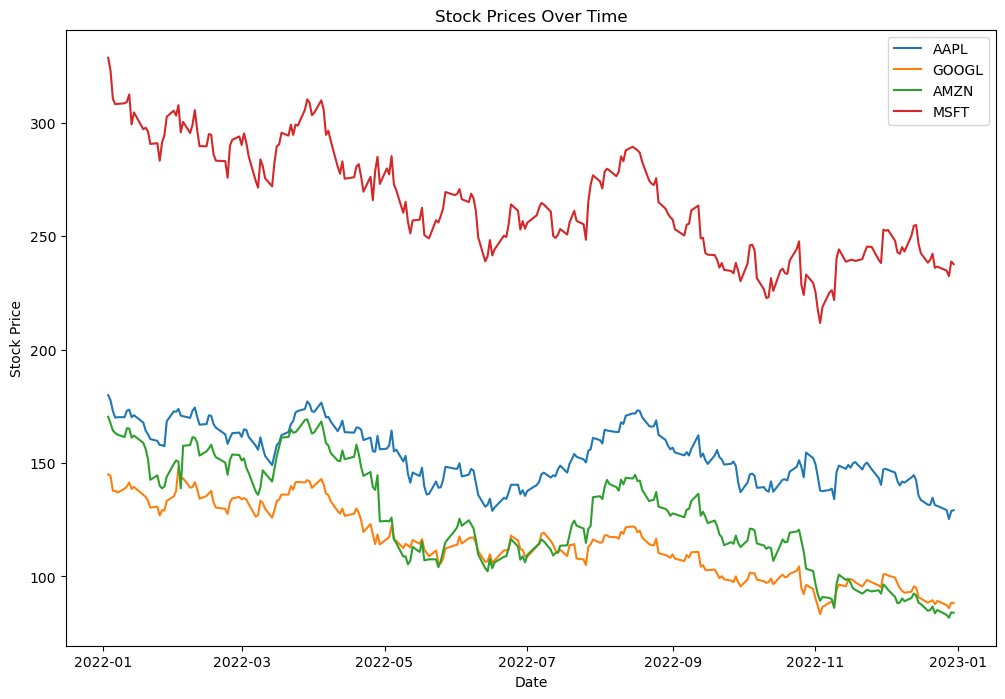

In [4]:
plt.figure(figsize=(12, 8))
for stock, data in stock_data.items():
    plt.plot(data['Adj Close'], label=stock)

plt.title('Stock Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

### Visualize the change in a stock’s volume being traded, over time?

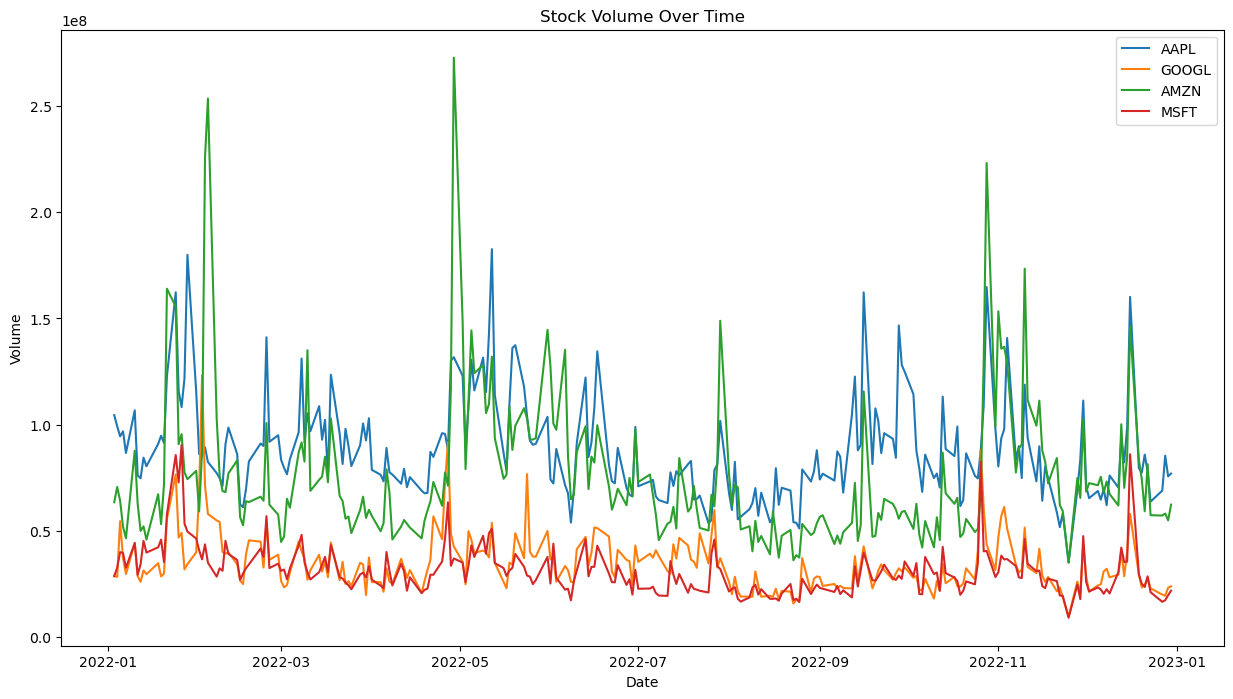

In [5]:
plt.figure(figsize=(15, 8))
for stock, data in stock_data.items():
    plt.plot(data['Volume'], label=stock)

plt.title('Stock Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.show()


### What was the moving average of various stocks?

In [6]:
for stock, data in stock_data.items():
    data['Mov_Avg'] = data['Adj Close'].rolling(window=30).mean()

print(data['Mov_Avg'])

Date
2022-01-03           NaN
2022-01-04           NaN
2022-01-05           NaN
2022-01-06           NaN
2022-01-07           NaN
                 ...    
2022-12-23    243.796833
2022-12-27    243.484419
2022-12-28    243.274904
2022-12-29    243.265652
2022-12-30    243.202545
Name: Mov_Avg, Length: 251, dtype: float64


### What was the daily return average of a stock?

In [7]:
for stock, data in stock_data.items():
    data['Daily Return'] = data['Adj Close'].pct_change()

print( data['Daily Return'])

Date
2022-01-03         NaN
2022-01-04   -0.017147
2022-01-05   -0.038388
2022-01-06   -0.007902
2022-01-07    0.000510
                ...   
2022-12-23    0.002267
2022-12-27   -0.007414
2022-12-28   -0.010255
2022-12-29    0.027630
2022-12-30   -0.004938
Name: Daily Return, Length: 251, dtype: float64


### Adda new column ‘Trend’ whose values are based on the 'Daily Return'.

In [8]:
for stock, data in stock_data.items():
    data['Trend'] = pd.cut(data['Daily Return'], bins=[-float('inf'), 0, float('inf')], labels=['Down', 'Up'])

print(data['Trend'])

Date
2022-01-03     NaN
2022-01-04    Down
2022-01-05    Down
2022-01-06    Down
2022-01-07      Up
              ... 
2022-12-23      Up
2022-12-27    Down
2022-12-28    Down
2022-12-29      Up
2022-12-30    Down
Name: Trend, Length: 251, dtype: category
Categories (2, object): ['Down' < 'Up']


### Visualize trend frequency through a Pie Chart.

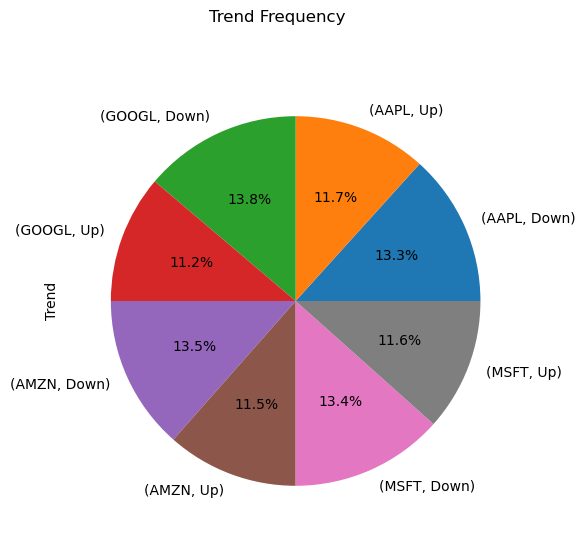

In [9]:
trend_counts = pd.concat([data['Trend'].value_counts() for data in stock_data.values()], keys=stocks)
trend_counts.plot.pie(figsize=(15, 6), autopct='%1.1f%%')
plt.suptitle('Trend Frequency')
plt.show()

### What was the correlation between the daily returns of different stocks?

In [10]:
daily_returns = pd.concat([data['Daily Return'] for data in stock_data.values()], axis=1, keys=stocks)
corr_matrix = daily_returns.corr()

print("Correlation Matrix:\n",corr_matrix)

Correlation Matrix:
            AAPL     GOOGL      AMZN      MSFT
AAPL   1.000000  0.798269  0.695904  0.824901
GOOGL  0.798269  1.000000  0.722229  0.850336
AMZN   0.695904  0.722229  1.000000  0.741197
MSFT   0.824901  0.850336  0.741197  1.000000


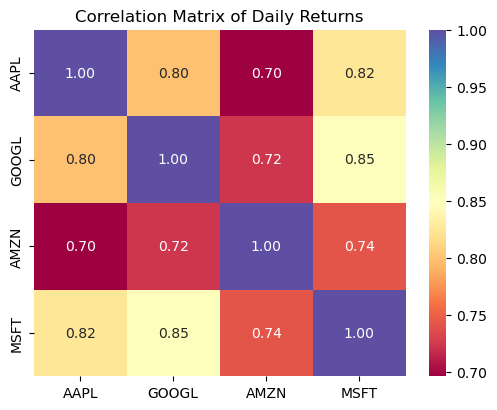

In [11]:
plt.figure(figsize=(6, 4.5))
sns.heatmap(corr_matrix, annot=True, cmap='Spectral', fmt=".2f")
plt.title('Correlation Matrix of Daily Returns')
plt.show()